# K-Nearest Neighbors (K-NN)

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
dataset = pd.read_csv('penguins.csv')
dataset.dropna(inplace=True)  # Remove rows with missing values

In [3]:
# 'bill_length_mm' and 'flipper_length_mm' are features and 'species' is the target variable
X = dataset[['flipper_length_mm', 'bill_length_mm']].values
y = dataset['species'].values

In [4]:
print("X: \n",X)
print("y: \n",y)

X: 
 [[181.   39.1]
 [186.   39.5]
 [195.   40.3]
 [193.   36.7]
 [190.   39.3]
 [181.   38.9]
 [195.   39.2]
 [182.   41.1]
 [191.   38.6]
 [198.   34.6]
 [185.   36.6]
 [195.   38.7]
 [197.   42.5]
 [184.   34.4]
 [194.   46. ]
 [174.   37.8]
 [180.   37.7]
 [189.   35.9]
 [185.   38.2]
 [180.   38.8]
 [187.   35.3]
 [183.   40.6]
 [187.   40.5]
 [172.   37.9]
 [180.   40.5]
 [178.   39.5]
 [178.   37.2]
 [188.   39.5]
 [184.   40.9]
 [195.   36.4]
 [196.   39.2]
 [190.   38.8]
 [180.   42.2]
 [181.   37.6]
 [184.   39.8]
 [182.   36.5]
 [195.   40.8]
 [186.   36. ]
 [196.   44.1]
 [185.   37. ]
 [190.   39.6]
 [182.   41.1]
 [190.   36. ]
 [191.   42.3]
 [186.   39.6]
 [188.   40.1]
 [190.   35. ]
 [200.   42. ]
 [187.   34.5]
 [191.   41.4]
 [186.   39. ]
 [193.   40.6]
 [181.   36.5]
 [194.   37.6]
 [185.   35.7]
 [195.   41.3]
 [185.   37.6]
 [192.   41.1]
 [184.   36.4]
 [192.   41.6]
 [195.   35.5]
 [188.   41.1]
 [190.   35.9]
 [198.   41.8]
 [190.   33.5]
 [190.   39.7]
 [196

# Feature Scaling

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encoding the target variable
le = LabelEncoder()
y = le.fit_transform(y)
# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

# Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print("X_train: \n",X_train)
print("y_train: \n",y_train)
print("X_test: \n",X_test)
print("y_test: \n",y_test)

X_train: 
 [[ 5.74005180e-01  4.04217019e-01]
 [ 2.07457274e+00  1.48471386e+00]
 [ 2.14602834e+00  1.88761099e+00]
 [-1.42675157e+00 -9.32668901e-01]
 [-1.42675157e+00 -1.17074448e+00]
 [ 7.88371974e-01  9.16995180e-01]
 [-2.83461997e-01  1.33820581e+00]
 [-1.21238477e+00 -7.67847349e-01]
 [ 7.88371974e-01  6.42292594e-01]
 [ 2.88182788e-01 -5.29771775e-01]
 [-2.12006399e-01  1.13675725e+00]
 [-5.69284390e-01 -1.31725252e+00]
 [ 1.43147236e+00  7.70487134e-01]
 [-9.26562380e-01 -7.12906832e-01]
 [ 5.74005180e-01  6.42292594e-01]
 [ 2.07457274e+00  2.03411903e+00]
 [ 8.59827573e-01  8.07114146e-01]
 [ 1.00273877e+00  6.60606100e-01]
 [-5.69284390e-01 -7.86160855e-01]
 [ 1.07419437e+00  6.78919605e-01]
 [-7.83651184e-01 -1.07917695e+00]
 [ 1.57438355e+00  1.22832478e+00]
 [-5.69284390e-01 -6.94593326e-01]
 [-7.12195586e-01 -9.50982407e-01]
 [ 7.16916376e-01  3.85903513e-01]
 [-4.26373194e-01 -3.46636717e-01]
 [ 3.59638386e-01  1.44808685e+00]
 [-1.40550801e-01  7.52173628e-01]
 [-5.6928

# Training the K-NN model on the Training set

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

# Predicting a new result

In [8]:
prediction = classifier.predict(sc.transform([[210, 59]]))
species = le.inverse_transform(prediction)
print("Classification of Predit: \n", species)

Classification of Predit: 
 ['Chinstrap']


# Predicting the Test set results

In [9]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]]


# Making the Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Consfusion matrix: \n",cm)
accuracy_score(y_test, y_pred)

Consfusion matrix: 
 [[42  0  0]
 [ 0 15  0]
 [ 0  0 27]]


1.0

# Visualising the Training set results

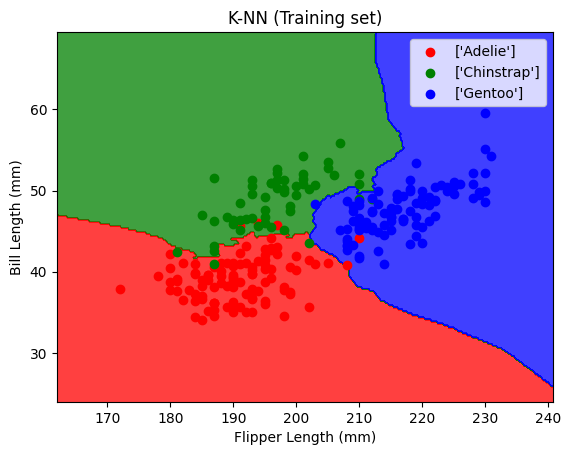

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green', 'blue'))(i), label = le.inverse_transform([j]))
plt.title('K-NN (Training set)')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Length (mm)')
plt.legend()
plt.show()

# Visualising the Test set results

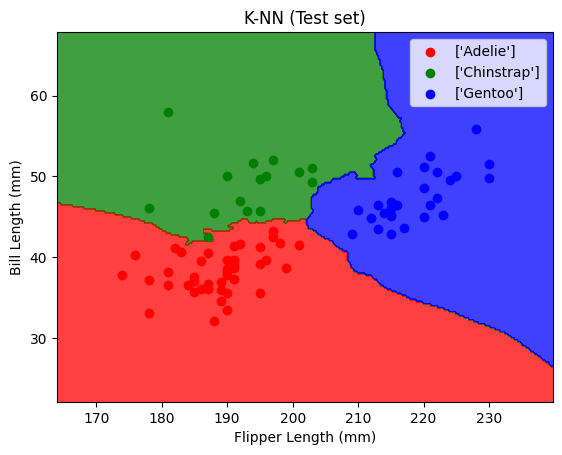

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green', 'blue'))(i), label = le.inverse_transform([j]))
plt.title('K-NN (Test set)')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Length (mm)')
plt.legend()
plt.show()